In [436]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np
from tqdm import tqdm

In [437]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential( # input size = 128x128x3
            nn.Conv2d(3, 3, kernel_size=3, stride=2, padding=1), # 3x64x
            nn.BatchNorm2d(3),
            nn.ReLU(),
            nn.Conv2d(3, 3, kernel_size=3, stride=2, padding=1), # 3x32x32
            #nn.BatchNorm2d(3),
            #nn.ReLU(),
            #nn.Conv2d(3, 3, kernel_size=3, stride=2, padding=1), # 3x16x16
        )
        
    def forward(self, x):
        return self.encoder(x)

In [438]:
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(3, 3, kernel_size=3, stride=2, padding=1, output_padding=1), # 3x32x32
            nn.BatchNorm2d(3),
            nn.ReLU(),
            nn.ConvTranspose2d(3, 3, kernel_size=3, stride=2, padding=1, output_padding=1), # 3x64x64
            #nn.BatchNorm2d(3),
            #nn.ReLU(),
            #nn.ConvTranspose2d(3, 3, kernel_size=3, stride=2, padding=1, output_padding=1), # 3x128x128
        )
        
    def forward(self, x):
        return self.decoder(x)

In [439]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5 for _ in range(3)], [0.5 for _ in range(3)]) # flexible normalization for dif channels
])

In [440]:
BATCH_SIZE = 128
EPOCHS = 4
LEARNING_RATE = 1e-3
LOSS_FUNCTION = nn.MSELoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [441]:
dataset = datasets.ImageFolder(root="../celeb_dataset/", transform=transform)
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [442]:
encoder = Encoder().to(device)
decoder = Decoder().to(device)

In [443]:
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=LEARNING_RATE)

In [444]:
fixed_images = next(iter(loader))[0][:4].to(device)

Encoded Fixed Images


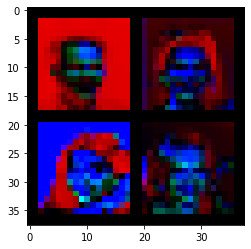

Decoded Fixed Images


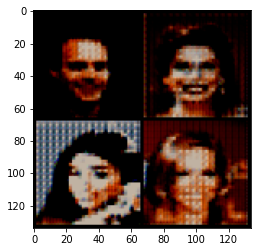

Encoded Fixed Images


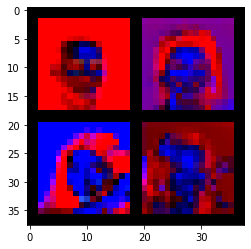

Decoded Fixed Images


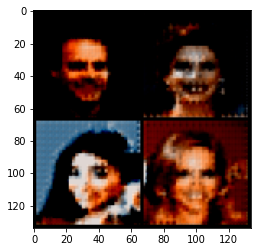

Encoded Fixed Images


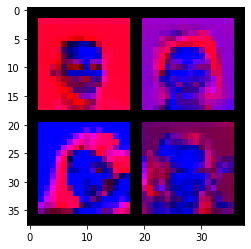

Decoded Fixed Images


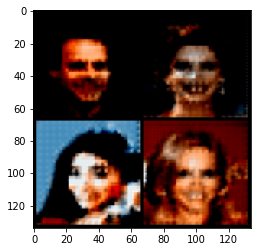

Encoded Fixed Images


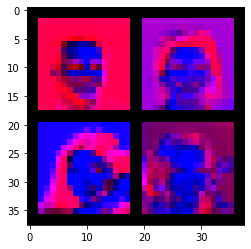

Decoded Fixed Images


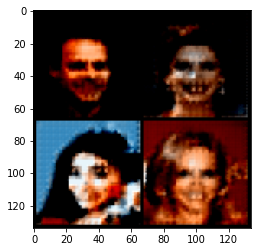

In [445]:
encoder.train()
decoder.train()

for epoch in range(EPOCHS):
    loop = tqdm(enumerate(loader), total=len(loader), leave=False)
    for batch_index, (image, _) in loop:
        
        image = image.to(device)
        
        encoded = encoder(image)
        decoded = decoder(encoded)
        
        loss = LOSS_FUNCTION(decoded, image)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loop.set_description(f"Epoch [{epoch}/{EPOCHS}]")
        loop.set_postfix(loss=loss.item())
        
    print('Encoded Fixed Images')
    images = encoder(fixed_images)
    fixed_image_grid = make_grid(images, nrow=2).permute(1, 2, 0).detach().cpu()
    plt.imshow(torch.clamp(fixed_image_grid, min=0, max=1).numpy())
    plt.show()
            
    print("Decoded Fixed Images")
    images_decoded = decoder(images)
    fixed_image_grid_decoded = make_grid(images_decoded, nrow=2).permute(1, 2, 0).detach().cpu()
    plt.imshow(torch.clamp(fixed_image_grid_decoded, min=0, max=1).numpy())
    plt.show()
    

Encoded Fixed Images


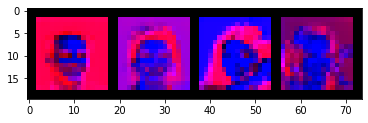

In [446]:
print('Encoded Fixed Images')
images = encoder(fixed_images)
fixed_image_grid = make_grid(images, nrow=4).permute(1, 2, 0).detach().cpu()
plt.imshow(torch.clamp(fixed_image_grid, min=0, max=1).numpy())
plt.show()